In [ ]:
import matplotlib
import os

# Matplotlib 폰트 캐시 경로 확인
cache_path = matplotlib.get_cachedir()
print(cache_path)  # 캐시 경로 확인

# 캐시 파일 삭제
font_cache_file = os.path.join(cache_path, 'fontlist-v330.json')  # 버전에 따라 파일명이 달라질 수 있음
if os.path.exists(font_cache_file):
    os.remove(font_cache_file)
    print("폰트 캐시 삭제 완료")
else:
    print("폰트 캐시 파일이 존재하지 않음")


/root/.cache/matplotlib
폰트 캐시 파일이 존재하지 않음


In [ ]:
# 나눔 폰트 설치 / 한글 깨짐 방지 , 런타임 다시 시작하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import requests

import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='NanumGothic') #matplotlib 한글 깨짐 방지

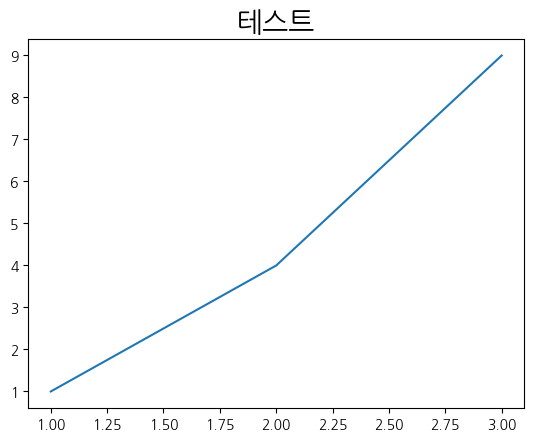

In [ ]:
plt.plot([1,2,3],[1,4,9])
plt.title("테스트", fontsize=20)
plt.show()


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/빅콘테스트/data/df_0929_ver_1.csv')
df.head(2)

,store_id,store_address,store_name,brand_code,industry,open_date,close_date,ref_year_month,operation_months_range,sales_amount_range,...,nearest_bus_lat,nearest_bus_lon,nearest_bus_dist_km,nearest_subway,nearest_subway_lat,nearest_subway_lon,nearest_subway_dist_km,nearest_subway_passengers,bus_200m_count,subway_500m_count
0,16184E93D9,서울 성동구 마장동,성우**,NaN,축산물,20130320.0,NaN,202405,2_10-25%,3_25-50%,...,37.567063,127.044643,0.096983,마장,37.5661,127.042973,0.209686,11287.552632,3,1
1,16184E93D9,서울 성동구 마장동,성우**,NaN,축산물,20130320.0,NaN,202304,2_10-25%,4_50-75%,...,37.567063,127.044643,0.096983,마장,37.5661,127.042973,0.209686,11287.552632,3,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86542 entries, 0 to 86541
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   store_id                    86542 non-null  object 
 1   store_address               86542 non-null  object 
 2   store_name                  86542 non-null  object 
 3   brand_code                  11725 non-null  object 
 4   industry                    86542 non-null  object 
 5   open_date                   86542 non-null  float64
 6   close_date                  2334 non-null   float64
 7   ref_year_month              86542 non-null  int64  
 8   operation_months_range      86542 non-null  object 
 9   sales_amount_range          86542 non-null  object 
 10  sales_count_range           86542 non-null  object 
 11  unique_customers_range      86542 non-null  object 
 12  avg_spending_range          86542 non-null  object 
 13  cancel_rate_range           799

In [ ]:
len(df.columns)

59

In [ ]:
# 추가할 파생 변수 컬럼
additional_cols = [
    'nearest_bus', 'nearest_bus_lat', 'nearest_bus_lon', 'nearest_bus_dist_km',
    'nearest_subway', 'nearest_subway_lat', 'nearest_subway_lon', 'nearest_subway_dist_km',
    'nearest_subway_passengers', 'bus_200m_count', 'subway_500m_count'
]

# 가맹점별 집계
store_level_data = df.groupby('store_id').agg({
    'store_address': 'first',
    'store_name': 'first',
    'brand_code': 'first',
    'industry': 'first',
    'open_date': 'first',
    'close_date': 'first',
    'ref_year_month': 'first',
    'operation_months_range': 'first',
    'sales_amount_range': 'first',
    'sales_count_range': 'first',
    'unique_customers_range': 'first',
    'avg_spending_range': 'first',
    'cancel_rate_range': 'first',
    'delivery_sales_ratio': 'mean',
    'industry_sales_ratio': 'mean',
    'industry_sales_count_ratio': 'mean',
    'industry_sales_rank_ratio': 'mean',
    'district_sales_rank_ratio': 'mean',
    'industry_closure_ratio': 'mean',
    'district_closure_ratio': 'mean',
    'male_20_under_ratio': 'mean',
    'male_30_ratio': 'mean',
    'male_40_ratio': 'mean',
    'male_50_ratio': 'mean',
    'male_60_over_ratio': 'mean',
    'female_20_under_ratio': 'mean',
    'female_30_ratio': 'mean',
    'female_40_ratio': 'mean',
    'female_50_ratio': 'mean',
    'female_60_over_ratio': 'mean',
    'returning_customer_ratio': 'mean',
    'new_customer_ratio': 'mean',
    'resident_customer_ratio': 'mean',
    'worker_customer_ratio': 'mean',
    'floating_customer_ratio': 'mean',
    'is_closed': 'first',
    'start': 'first',
    'end': 'first',
    'year': 'first',
    'month': 'first',
    'YM': 'first',
    'region_3depth_h_name': 'first',
    'region_3depth_name': 'first',
    'x': 'first',
    'y': 'first',
    'industry_group': 'first',
    'business_district': 'first',
    **{col: 'first' for col in additional_cols}  # 새 컬럼들 추가
}).reset_index()

store_level_data

,store_id,store_address,store_name,brand_code,industry,open_date,close_date,ref_year_month,operation_months_range,sales_amount_range,...,nearest_bus_lat,nearest_bus_lon,nearest_bus_dist_km,nearest_subway,nearest_subway_lat,nearest_subway_lon,nearest_subway_dist_km,nearest_subway_passengers,bus_200m_count,subway_500m_count
0,000F03E44A,서울특별시 성동구 왕십리로4가길 9,육육**,None,중식-딤섬/중식만두,20220225.0,NaN,202404,4_50-75%,5_75-90%,...,37.546072,127.044896,0.147105,뚝섬,37.547184,127.047367,0.213543,50251.631579,4,2
1,002816BA73,서울 성동구 청계천로10나길 78,자갈***********,None,요리주점,20140507.0,NaN,202404,2_10-25%,3_25-50%,...,37.570259,127.037511,0.040130,용두,37.574028,127.038091,0.445188,4979.315789,3,1
2,003473B465,서울특별시 성동구 서울숲길 55,바틀****************,None,백반/가정식,20190507.0,NaN,202401,3_25-50%,6_90%초과(하위 10% 이하),...,37.549516,127.044457,0.163488,뚝섬,37.547184,127.047367,0.347690,50251.631579,2,1
3,003AC99735,서울특별시 성동구 용답중앙15길 12,메가************,커피전문점2,커피전문점,20191017.0,NaN,202311,4_50-75%,2_10-25%,...,37.565450,127.054396,0.130569,답십리,37.566747,127.052704,0.279720,29394.052632,4,2
4,0041E4E5AE,서울특별시 성동구 용답중앙15길 1,엄마****,None,한식-찌개/전골,20180115.0,NaN,202409,3_25-50%,2_10-25%,...,37.565450,127.054396,0.217227,용답,37.561904,127.050899,0.283286,5947.552632,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4178,FFAC8CC0F7,서울 성동구 성수일로12길 27.,일미****,None,한식-국밥/설렁탕,20090424.0,NaN,202310,2_10-25%,3_25-50%,...,37.549624,127.055388,0.157044,성수,37.544581,127.055961,0.441988,106454.921053,1,1
4179,FFD5654C3D,서울 성동구 마조로1가길 4,부대***,None,한식-찌개/전골,20110218.0,NaN,202405,2_10-25%,3_25-50%,...,37.560388,127.041155,0.139197,왕십리,37.561827,127.038352,0.203493,24636.605263,3,3
4180,FFE9F1CC6A,서울특별시 성동구 용답19길 13-1,김첨*,None,백반/가정식,20241128.0,NaN,202411,6_90%초과(하위 10% 이하),6_90%초과(하위 10% 이하),...,37.565450,127.054396,0.284555,용답,37.561904,127.050899,0.216303,5947.552632,0,2
4181,FFEDAC5747,서울특별시 성동구 고산자로6길 40,파리**********,베이커리10,베이커리,20190110.0,NaN,202312,3_25-50%,1_10%이하,...,37.558100,127.034245,0.109945,왕십리,37.561238,127.036954,0.359708,24636.605263,7,3


In [ ]:
store_level_data['end'] = pd.to_datetime(store_level_data['end'], errors='coerce')
store_level_data['end'].dt.year.value_counts()

# 일단 2025만 보겠음

,count
end,
2025.0,97
2023.0,15
2024.0,15


In [ ]:
# 2025년 데이터만 남기기
# end가 NaT이거나, end의 연도가 2025인 경우만 남기기
store_level_data = store_level_data[
    (store_level_data['end'].isna()) | (store_level_data['end'].dt.year == 2025)
]

store_level_data['end'].dt.year.value_counts()


,count
end,
2025.0,97


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86542 entries, 0 to 86541
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   store_id                    86542 non-null  object 
 1   store_address               86542 non-null  object 
 2   store_name                  86542 non-null  object 
 3   brand_code                  11725 non-null  object 
 4   industry                    86542 non-null  object 
 5   open_date                   86542 non-null  float64
 6   close_date                  2334 non-null   float64
 7   ref_year_month              86542 non-null  int64  
 8   operation_months_range      86542 non-null  object 
 9   sales_amount_range          86542 non-null  object 
 10  sales_count_range           86542 non-null  object 
 11  unique_customers_range      86542 non-null  object 
 12  avg_spending_range          86542 non-null  object 
 13  cancel_rate_range           799

In [ ]:
counts = df.groupby('store_id').count()['YM'].value_counts(normalize=True)
counts_cum = counts.cumsum()

print(counts)      # 비율
print(counts_cum)  # 누적 비율


YM
24    0.727707
8     0.016734
14    0.014822
21    0.014105
3     0.014105
17    0.013866
5     0.013866
9     0.013388
4     0.012670
7     0.012670
16    0.012670
11    0.011714
18    0.011475
12    0.011475
6     0.011236
22    0.011236
19    0.010997
2     0.010997
15    0.010758
13    0.010519
10    0.010280
20    0.009563
23    0.006933
1     0.006216
Name: proportion, dtype: float64
YM
24    0.727707
8     0.744442
14    0.759264
21    0.773368
3     0.787473
17    0.801339
5     0.815204
9     0.828592
4     0.841262
7     0.853933
16    0.866603
11    0.878317
18    0.889792
12    0.901267
6     0.912503
22    0.923739
19    0.934736
2     0.945733
15    0.956491
13    0.967009
10    0.977289
20    0.986852
23    0.993784
1     1.000000
Name: proportion, dtype: float64


In [ ]:
# 1. 폐업한 가맹점만 필터
closed_counts = (
    df[df['is_closed'] == True]
      .groupby('store_id')['YM']
      .count()
)

# 2. value_counts 후 내림차순 정렬
vc = closed_counts.value_counts().sort_index(ascending=False)

# 3. 비율 + 누적비율 계산
vc_df = pd.DataFrame({
    'count': vc,
    'ratio': vc / vc.sum(),
    'cum_ratio': (vc / vc.sum()).cumsum()
})

print(vc_df)


    count     ratio  cum_ratio
YM                            
24     66  0.519685   0.519685
23      2  0.015748   0.535433
22      1  0.007874   0.543307
21      2  0.015748   0.559055
20      1  0.007874   0.566929
19      5  0.039370   0.606299
18      2  0.015748   0.622047
17      9  0.070866   0.692913
16      4  0.031496   0.724409
15      1  0.007874   0.732283
14      1  0.007874   0.740157
13      1  0.007874   0.748031
12      5  0.039370   0.787402
11      3  0.023622   0.811024
10      3  0.023622   0.834646
9       2  0.015748   0.850394
8       3  0.023622   0.874016
7       2  0.015748   0.889764
6       1  0.007874   0.897638
5       4  0.031496   0.929134
4       4  0.031496   0.960630
3       1  0.007874   0.968504
2       2  0.015748   0.984252
1       2  0.015748   1.000000


# 1. 변화량 관련 파생변수 생성

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm


In [ ]:
# 처리할 컬럼
cols = ['operation_months_range','sales_amount_range','sales_count_range',
        'unique_customers_range','avg_spending_range','cancel_rate_range']

for col in cols:
    # 1) 숫자 추출 (NaN 허용)
    df[col] = df[col].str.extract(r'^(\d+)')[0].astype(float)

# 확인
df[cols].head()


,operation_months_range,sales_amount_range,sales_count_range,unique_customers_range,avg_spending_range,cancel_rate_range
0,2.0,3.0,4.0,4.0,2.0,6.0
1,2.0,4.0,4.0,4.0,2.0,6.0
2,2.0,3.0,4.0,4.0,2.0,1.0
3,2.0,3.0,4.0,4.0,1.0,1.0
4,2.0,3.0,4.0,4.0,1.0,1.0


In [ ]:
# ============================================
# Step 1-1: 전체 데이터 사용 (필터링 X)
# ============================================
print("=" * 60)
print("Step 1-1: 전체 가맹점 데이터 사용 (상대적 비교 방식)")
print("=" * 60)

main_df = df.copy()

print(f"사용 데이터: {len(main_df):,}개 레코드, {main_df['store_id'].nunique():,}개 가맹점")
print(f"폐업점: {main_df.groupby('store_id')['is_closed'].first().sum()}개")
print()


Step 1-1: 전체 가맹점 데이터 사용 (상대적 비교 방식)
사용 데이터: 86,542개 레코드, 4,183개 가맹점
폐업점: 127개



In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm

# ============================================
# 안전 집계 함수
# ============================================
def safe_mean(series):
    if len(series) == 0 or series.isna().all():
        return np.nan
    return series.mean()

def safe_std(series):
    if len(series) < 2 or series.isna().all():
        return np.nan
    return series.std()

def safe_min(series):
    if len(series) == 0 or series.isna().all():
        return np.nan
    return series.min()

def safe_max(series):
    if len(series) == 0 or series.isna().all():
        return np.nan
    return series.max()

# ============================================
# 변화 지표 함수들
# ============================================
def calculate_deterioration_count(series):
    if len(series) < 2:
        return 0
    diff = series.diff()
    return (diff > 0).sum()

def calculate_consecutive_deterioration(series):
    if len(series) < 2:
        return 0
    diff = series.diff()
    max_consecutive = 0
    current_consecutive = 0
    for val in diff:
        if val > 0:
            current_consecutive += 1
            max_consecutive = max(max_consecutive, current_consecutive)
        else:
            current_consecutive = 0
    return max_consecutive

def calculate_worst_zone_ratio(series):
    if len(series) == 0:
        return np.nan
    return ((series >= 5).sum()) / len(series)

def split_early_late(store_data):
    n = len(store_data)
    split_point = n // 2
    early = store_data.iloc[:split_point]
    late = store_data.iloc[split_point:]
    return early, late

def calculate_relative_change(store_data, col):
    early, late = split_early_late(store_data)
    early_mean = safe_mean(early[col])
    late_mean = safe_mean(late[col])
    if pd.isna(early_mean) or pd.isna(late_mean):
        return np.nan
    return late_mean - early_mean

# ============================================
# 자동 feature 리스트 생성
# ============================================
# 수치형/비율형 컬럼 자동화
numeric_cols = [
    'sales_amount_range', 'sales_count_range', 'unique_customers_range',
    'avg_spending_range', 'cancel_rate_range',
    'delivery_sales_ratio', 'industry_sales_ratio', 'industry_sales_count_ratio',
    'industry_sales_rank_ratio', 'district_sales_rank_ratio',
    'industry_closure_ratio', 'district_closure_ratio',
    'male_20_under_ratio', 'male_30_ratio', 'male_40_ratio', 'male_50_ratio', 'male_60_over_ratio',
    'female_20_under_ratio', 'female_30_ratio', 'female_40_ratio', 'female_50_ratio', 'female_60_over_ratio',
    'returning_customer_ratio', 'new_customer_ratio',
    'resident_customer_ratio', 'worker_customer_ratio', 'floating_customer_ratio',
    'nearest_subway_dist_km', 'subway_500m_count', 'bus_200m_count',
    'nearest_subway_passengers'
]
# 범주형/정적 컬럼
static_cols = [
    'store_id', 'is_closed', 'business_district', 'region_3depth_name',
    'industry', 'industry_group', 'store_address', 'store_name', 'brand_code',
    'x', 'y', 'nearest_bus', 'nearest_subway', 'open_date', 'close_date'
]

# range 컬럼 변환
for col in numeric_cols:
    if col in main_df.columns and main_df[col].dtype == 'object':
        main_df[col] = pd.to_numeric(main_df[col], errors='coerce')

store_features_list = []
for store_id, store_data in tqdm(main_df.groupby('store_id'), desc="가맹점별 feature 계산"):
    store_data = store_data.sort_values('ref_year_month')
    early_data, late_data = split_early_late(store_data)
    recent_3m = store_data.tail(3) if len(store_data) >= 3 else store_data
    first_3m = store_data.head(3) if len(store_data) >= 3 else store_data

    features = dict()

    # ---- 정적 정보 ----
    for col in static_cols:
        if col in store_data.columns:
            features[col] = store_data[col].iloc[0]
        else:
            features[col] = np.nan

    # ---- 변화량/절대값 자동화 ----
    for col in numeric_cols:
        if col not in store_data.columns:
            continue
        series = store_data[col]
        early_series = early_data[col]
        late_series = late_data[col]

        # 전체/초기/후기/최근3개월
        features[f'{col}_mean'] = safe_mean(series)
        features[f'{col}_std'] = safe_std(series)
        features[f'{col}_min'] = safe_min(series)
        features[f'{col}_max'] = safe_max(series)

        features[f'{col}_early_mean'] = safe_mean(early_series)
        features[f'{col}_late_mean'] = safe_mean(late_series)
        features[f'{col}_recent3_mean'] = safe_mean(recent_3m[col])
        features[f'{col}_first3_mean'] = safe_mean(first_3m[col])
        features[f'{col}_diff'] = features[f'{col}_late_mean'] - features[f'{col}_early_mean']
        features[f'{col}_start_end_diff'] = features[f'{col}_recent3_mean'] - features[f'{col}_first3_mean']

        # 변화량 특화 함수(몇몇 컬럼에 한정)
        if 'range' in col or 'ratio' in col or 'rank' in col:
            features[f'{col}_deterioration_count'] = calculate_deterioration_count(series)
            features[f'{col}_consecutive_deterioration'] = calculate_consecutive_deterioration(series)
            features[f'{col}_worst_zone_ratio'] = calculate_worst_zone_ratio(series)

    # ---- 복합/맞춤 지표 ----
    # 악화 가속도(후기 - 초기)
    if 'sales_amount_range' in store_data.columns:
        early_sales = early_data['sales_amount_range']
        late_sales = late_data['sales_amount_range']
        features['sales_deterioration_acceleration'] = calculate_deterioration_count(late_sales)-calculate_deterioration_count(early_sales)
        features['sales_volatility_increase'] = safe_std(late_sales) - safe_std(early_sales)
    # 고령층 비율
    elderly_cols = [
        'male_50_ratio', 'male_60_over_ratio', 'female_50_ratio', 'female_60_over_ratio'
    ]
    if all(col in store_data.columns for col in elderly_cols):
        early_elderly = safe_mean(early_data[elderly_cols].sum(axis=1))
        late_elderly = safe_mean(late_data[elderly_cols].sum(axis=1))
        features['elderly_ratio_change'] = late_elderly - early_elderly
        features['elderly_ratio_early'] = early_elderly
        features['elderly_ratio_late'] = late_elderly

    # 재방문율 변화
    if 'returning_customer_ratio' in store_data.columns:
        early_return = safe_mean(early_data['returning_customer_ratio'])
        late_return = safe_mean(late_data['returning_customer_ratio'])
        features['returning_customer_change'] = early_return - late_return

    features['months_count'] = len(store_data)

    store_features_list.append(features)

store_features = pd.DataFrame(store_features_list)

print("\n✅ 전체 확장 feature dataframe 생성 완료!")
print(f" ─ 가맹점 수: {len(store_features):,}")
print(f" ─ 변수 수(컬럼): {len(store_features.columns):,}")
print(f" ─ 폐업점 수: {store_features['is_closed'].sum() if 'is_closed' in store_features.columns else '-'}")


가맹점별 feature 계산: 100%|██████████| 4183/4183 [04:38<00:00, 15.00it/s]



✅ 전체 확장 feature dataframe 생성 완료!
 ─ 가맹점 수: 4,183
 ─ 변수 수(컬럼): 413
 ─ 폐업점 수: 127


In [ ]:
list(store_features.columns)

['store_id',
 'is_closed',
 'business_district',
 'region_3depth_name',
 'industry',
 'industry_group',
 'store_address',
 'store_name',
 'brand_code',
 'x',
 'y',
 'nearest_bus',
 'nearest_subway',
 'open_date',
 'close_date',
 'sales_amount_range_mean',
 'sales_amount_range_std',
 'sales_amount_range_min',
 'sales_amount_range_max',
 'sales_amount_range_early_mean',
 'sales_amount_range_late_mean',
 'sales_amount_range_recent3_mean',
 'sales_amount_range_first3_mean',
 'sales_amount_range_diff',
 'sales_amount_range_start_end_diff',
 'sales_amount_range_deterioration_count',
 'sales_amount_range_consecutive_deterioration',
 'sales_amount_range_worst_zone_ratio',
 'sales_count_range_mean',
 'sales_count_range_std',
 'sales_count_range_min',
 'sales_count_range_max',
 'sales_count_range_early_mean',
 'sales_count_range_late_mean',
 'sales_count_range_recent3_mean',
 'sales_count_range_first3_mean',
 'sales_count_range_diff',
 'sales_count_range_start_end_diff',
 'sales_count_range_dete

In [ ]:
# store_features.to_csv('store_ver1.csv',index=False)

In [ ]:
# 숫자 제거
store_features['brand_type'] = store_features['brand_code'].str.replace(r'\d+', '', regex=True)

# 그룹별 통계
brand_stats = store_features.groupby('brand_type').agg(
    total_count=('brand_code', 'count'),      # 전체 개수
    closed_ratio=('is_closed', 'mean')        # 폐점 비율
)

# 폐점 비율을 %로 변환
brand_stats['closed_ratio'] = brand_stats['closed_ratio'] * 100

# 보기 좋게 정렬 (폐점 비율 내림차순)
brand_stats = brand_stats.sort_values('closed_ratio', ascending=False)

print(brand_stats)


            total_count  closed_ratio
brand_type                           
도시락                   7     14.285714
동남아/인도음식              8     12.500000
햄버거                  10     10.000000
샌드위치/토스트             11      9.090909
한식-해물/생선             13      7.692308
한식-단품요리일반            15      6.666667
치킨                   92      6.521739
카페                   22      4.545455
백반/가정식               23      4.347826
분식                   31      3.225806
커피전문점                81      1.234568
담배                    1      0.000000
꼬치구이                  4      0.000000
수산물                   1      0.000000
베이커리                 35      0.000000
룸살롱/단란주점              2      0.000000
반찬                    3      0.000000
건강식품                  3      0.000000
기타세계요리                2      0.000000
식료품                   5      0.000000
식품 제조                 1      0.000000
일식-샤브샤브               1      0.000000
일식당                   4      0.000000
아이스크림/빙수             15      0.000000
양식          

In [ ]:
from openai import OpenAI

# Upstage API 클라이언트
client = OpenAI(
    api_key=api_key,
    base_url="https://api.upstage.ai/v1"
)

# 고유 업종
industries = list(set(store_features['industry'].dropna()))

# 업종별 임베딩 저장
industry_embeddings = {}
for industry in industries:
    response = client.embeddings.create(
        input=industry,
        model="embedding-query"
    )
    industry_embeddings[industry] = np.array(response.data[0].embedding)

print("✅ 임베딩 생성 완료")


✅ 임베딩 생성 완료


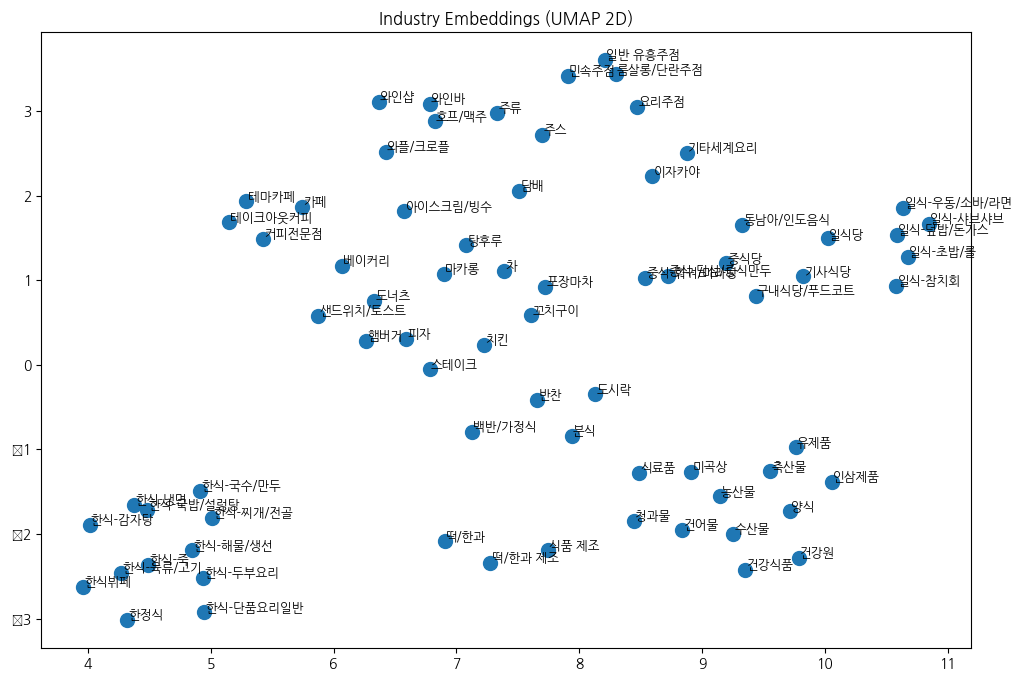

In [ ]:
import umap

# NaN 제거
emb_matrix = np.array([v for v in industry_embeddings.values() if v is not None])
industry_names = [k for k,v in industry_embeddings.items() if v is not None]

# UMAP으로 2D 임베딩
reducer = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=42)
embedding_2d = reducer.fit_transform(emb_matrix)

# 시각화
plt.figure(figsize=(12,8))
plt.scatter(embedding_2d[:,0], embedding_2d[:,1], s=100)
for i, name in enumerate(industry_names):
    plt.text(embedding_2d[i,0]+0.01, embedding_2d[i,1]+0.01, name, fontsize=9)
plt.title("Industry Embeddings (UMAP 2D)")
plt.show()


In [ ]:
industry_names = list(industry_embeddings.keys())
emb_matrix = np.array(list(industry_embeddings.values()))
print("임베딩 행렬 크기:", emb_matrix.shape)  # (업종 수, 4096)

임베딩 행렬 크기: (73, 4096)


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

cluster_candidates = [10, 20, 30, 40, 50]
silhouette_scores = []

for k in cluster_candidates:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(emb_matrix)
    score = silhouette_score(emb_matrix, labels)
    silhouette_scores.append(score)
    print(f"k={k}, Silhouette Score={score:.4f}")


k=10, Silhouette Score=0.0355
k=20, Silhouette Score=0.0548
k=30, Silhouette Score=0.0458
k=40, Silhouette Score=0.0597
k=50, Silhouette Score=0.0489


In [ ]:
optimal_k = cluster_candidates[np.argmax(silhouette_scores)]
print(f"최적 군집 개수: {optimal_k}")


최적 군집 개수: 40


In [ ]:
pca = PCA(n_components=20, random_state=42)
emb_matrix_reduced = pca.fit_transform(emb_matrix)
print("PCA 축소 후 shape:", emb_matrix_reduced.shape)


PCA 축소 후 shape: (73, 20)


In [ ]:
# industries 순서대로 emb_matrix_reduced 매핑
industry_to_vector = dict(zip(industries, emb_matrix_reduced))

# store_features에 40차원 컬럼 추가
for i in range(emb_matrix_reduced.shape[1]):
    col_name = f'industry_emb_{i+1}'
    store_features[col_name] = store_features['industry'].map(lambda x: industry_to_vector.get(x, np.nan)[i] if x in industry_to_vector else np.nan)


In [ ]:
list(store_features.columns)

['store_id',
 'is_closed',
 'business_district',
 'region_3depth_name',
 'industry',
 'industry_group',
 'store_address',
 'store_name',
 'brand_code',
 'x',
 'y',
 'nearest_bus',
 'nearest_subway',
 'open_date',
 'close_date',
 'sales_amount_range_mean',
 'sales_amount_range_std',
 'sales_amount_range_min',
 'sales_amount_range_max',
 'sales_amount_range_early_mean',
 'sales_amount_range_late_mean',
 'sales_amount_range_recent3_mean',
 'sales_amount_range_first3_mean',
 'sales_amount_range_diff',
 'sales_amount_range_start_end_diff',
 'sales_amount_range_deterioration_count',
 'sales_amount_range_consecutive_deterioration',
 'sales_amount_range_worst_zone_ratio',
 'sales_count_range_mean',
 'sales_count_range_std',
 'sales_count_range_min',
 'sales_count_range_max',
 'sales_count_range_early_mean',
 'sales_count_range_late_mean',
 'sales_count_range_recent3_mean',
 'sales_count_range_first3_mean',
 'sales_count_range_diff',
 'sales_count_range_start_end_diff',
 'sales_count_range_dete

## Step 2!

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# =================================================================
# Step 0: business_district Target Encoding (새로운 상권 변수 생성)
# =================================================================

# 1. Target 선택: 상권별 평균 매출 랭킹 (경쟁 강도와 규모를 반영)
# 'district_sales_rank_ratio_first3_mean'의 평균값으로 상권 특성을 인코딩합니다.
# 이 값은 이미 0과 1 사이로 정규화되어 있을 가능성이 높습니다.
target_col = 'district_sales_rank_ratio_first3_mean'

# 상권(business_district)별 평균 랭킹 비율을 계산
district_encoding_map = (
    store_features.groupby('business_district')[target_col]
    .mean()
    .to_dict()
)

# 새로운 변수 생성 및 데이터프레임에 추가
store_features['district_rank_encoding'] = store_features['business_district'].map(district_encoding_map)

# Target Encoding 변수를 정적 특성으로 사용하기 위해 drop_cols에서 제거


In [ ]:
# =================================================================
# Step 1: 클러스터링 변수 선택
# =================================================================

# 제거할 변수들
drop_cols = [
    'store_id', 'store_name', 'store_address',
    'open_date', 'close_date', 'brand_code',
    'business_district', 'region_3depth_name',
    'industry', 'industry_group',
    'nearest_bus', 'nearest_subway'
]

# 정적 특성 변수 선택
static_features = []
# 1. 입지 특성 (4개)
static_features.extend([
    'nearest_subway_dist_km_mean',
    'subway_500m_count_mean',
    'bus_200m_count_mean',
    'nearest_subway_passengers_mean'
])

# 2. 초기 사업 성과 (6개)
static_features.extend([
    'sales_amount_range_first3_mean',
    'sales_count_range_first3_mean',
    'unique_customers_range_first3_mean',
    'avg_spending_range_first3_mean',
    'cancel_rate_range_first3_mean',
    'delivery_sales_ratio_first3_mean'
])

# 3. 초기 상대적 위치 (2개)
static_features.extend([
    'industry_sales_rank_ratio_first3_mean',
    'district_sales_rank_ratio_first3_mean'
])

# 4. 초기 고객 구성 (10개)
demographic_vars = [
    'male_20_under_ratio_first3_mean',
    'male_30_ratio_first3_mean',
    'male_40_ratio_first3_mean',
    'male_50_ratio_first3_mean',
    'male_60_over_ratio_first3_mean',
    'female_20_under_ratio_first3_mean',
    'female_30_ratio_first3_mean',
    'female_40_ratio_first3_mean',
    'female_50_ratio_first3_mean',
    'female_60_over_ratio_first3_mean'
]
static_features.extend(demographic_vars)

# 5. 고객 유형 (4개)
static_features.extend([
    'returning_customer_ratio_mean',
    'resident_customer_ratio_mean',
    'worker_customer_ratio_mean',
    'floating_customer_ratio_mean'
])

# 6. 산업 임베딩 (20개)
industry_emb_cols = [f'industry_emb_{i}' for i in range(1, 21)]
static_features.extend(industry_emb_cols)

# 7. 상권 인코딩 변수
static_features.append('district_rank_encoding')

print(f"총 {len(static_features)}개 정적 특성 변수 선택")
print("\n=== 변수 카테고리별 개수 ===")
print(f"입지: 4개")
print(f"초기 사업 성과: 6개")
print(f"초기 상대 위치: 2개")
print(f"초기 고객 인구통계: 10개")
print(f"고객 유형: 4개")
print(f"산업 임베딩: 20개")
print(f"상권 인코딩: 1개")
print(f"총 변수 수: {len(static_features)}")


총 47개 정적 특성 변수 선택

=== 변수 카테고리별 개수 ===
입지: 4개
초기 사업 성과: 6개
초기 상대 위치: 2개
초기 고객 인구통계: 10개
고객 유형: 4개
산업 임베딩: 20개
상권 인코딩: 1개
총 변수 수: 47


In [ ]:
# =================================================================
# Step 2: 클러스터링 실행
# =================================================================

# 정적 특성 데이터 추출
X_static = store_features[static_features].copy()

# 결측치 확인 및 처리
print("\n=== 결측치 현황 ===")
missing_counts = X_static.isnull().sum()
missing_vars = missing_counts[missing_counts > 0]
if len(missing_vars) > 0:
    print(missing_vars)
    print(f"\n결측치 처리: 중앙값으로 대체")
    X_static = X_static.fillna(X_static.median())
else:
    print("결측치 없음!")

# 스케일링
scaler = StandardScaler()
X_static_scaled = scaler.fit_transform(X_static)

print(f"\n스케일링 완료: {X_static_scaled.shape}")



=== 결측치 현황 ===
cancel_rate_range_first3_mean         138
delivery_sales_ratio_first3_mean     2741
male_20_under_ratio_first3_mean        83
male_30_ratio_first3_mean              83
male_40_ratio_first3_mean              83
male_50_ratio_first3_mean              83
male_60_over_ratio_first3_mean         83
female_20_under_ratio_first3_mean      83
female_30_ratio_first3_mean            83
female_40_ratio_first3_mean            83
female_50_ratio_first3_mean            83
female_60_over_ratio_first3_mean       83
resident_customer_ratio_mean           13
worker_customer_ratio_mean             13
floating_customer_ratio_mean           13
dtype: int64

결측치 처리: 중앙값으로 대체

스케일링 완료: (4183, 47)



=== 최적 클러스터 수 탐색 ===
K= 3 | Inertia: 172,437 | Silhouette: 0.066
K= 4 | Inertia: 164,234 | Silhouette: 0.084
K= 5 | Inertia: 157,392 | Silhouette: 0.097
K= 6 | Inertia: 151,565 | Silhouette: 0.107
K= 7 | Inertia: 147,006 | Silhouette: 0.100
K= 8 | Inertia: 143,571 | Silhouette: 0.098
K= 9 | Inertia: 140,272 | Silhouette: 0.107
K=10 | Inertia: 136,937 | Silhouette: 0.108
K=11 | Inertia: 133,776 | Silhouette: 0.119
K=12 | Inertia: 130,845 | Silhouette: 0.125
K=13 | Inertia: 128,638 | Silhouette: 0.122
K=14 | Inertia: 125,741 | Silhouette: 0.126
K=15 | Inertia: 123,678 | Silhouette: 0.146
K=16 | Inertia: 121,192 | Silhouette: 0.142
K=17 | Inertia: 119,470 | Silhouette: 0.141
K=18 | Inertia: 117,416 | Silhouette: 0.135
K=19 | Inertia: 115,375 | Silhouette: 0.132
K=20 | Inertia: 113,964 | Silhouette: 0.157
K=21 | Inertia: 112,806 | Silhouette: 0.138
K=22 | Inertia: 110,129 | Silhouette: 0.145
K=23 | Inertia: 108,668 | Silhouette: 0.145
K=24 | Inertia: 107,308 | Silhouette: 0.147
K=25 | Ine

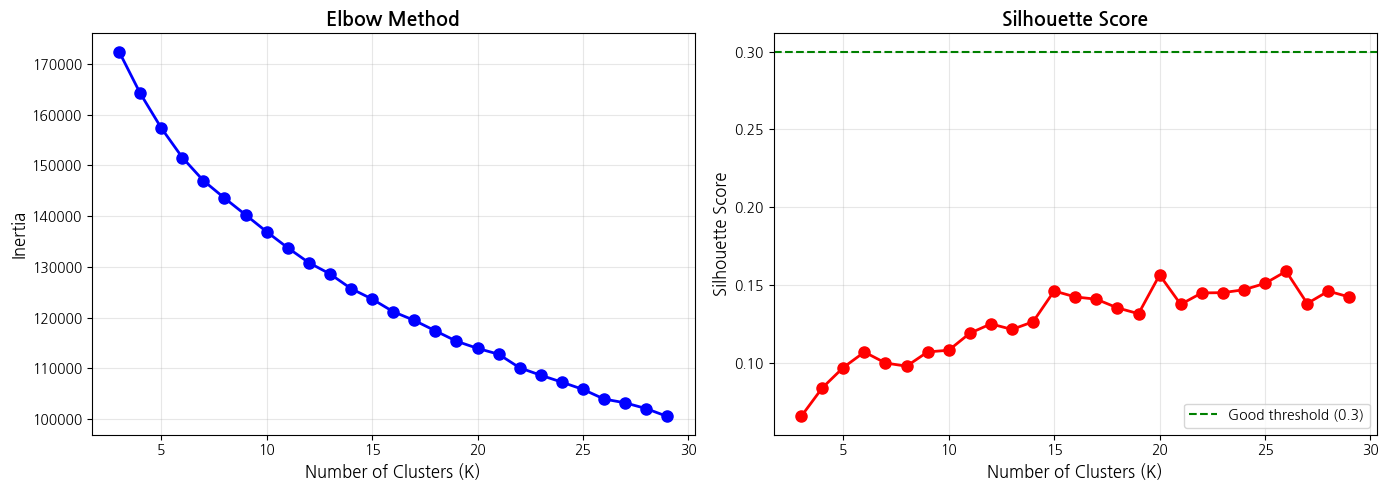

In [ ]:
print("\n=== 최적 클러스터 수 탐색 ===")

inertias = []
silhouette_scores = []
K_range = range(3, 30)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_static_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_static_scaled, kmeans.labels_))
    print(f"K={k:2d} | Inertia: {kmeans.inertia_:,.0f} | Silhouette: {silhouette_scores[-1]:.3f}")

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow Plot
axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[0].set_ylabel('Inertia', fontsize=12)
axes[0].set_title('Elbow Method', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Silhouette Score Plot
axes[1].plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[1].axhline(y=0.3, color='green', linestyle='--', label='Good threshold (0.3)')
axes[1].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('optimal_k_selection.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
optimal_k = 12  # 예시 - 실제로는 그래프 보고 결정

print(f"\n=== 최종 클러스터링 (K={optimal_k}) ===")
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
store_features['static_cluster'] = kmeans_final.fit_predict(X_static_scaled)



=== 최종 클러스터링 (K=12) ===


In [ ]:
print("\n=== 클러스터별 기본 통계 ===")
cluster_summary = store_features.groupby('static_cluster').agg({
    'is_closed': ['count', 'mean'],
    'months_count': 'mean',
    'sales_amount_range_mean': 'mean',
    'industry': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'N/A'
}).round(3)
cluster_summary.columns = ['가맹점수', '폐업률', '평균영업개월', '평균매출', '최빈업종']
print(cluster_summary)


=== 클러스터별 기본 통계 ===
                가맹점수    폐업률  평균영업개월   평균매출       최빈업종
static_cluster                                       
0                667  0.015  21.730  2.851   한식-육류/고기
1                469  0.032  19.770  3.036       요리주점
2                352  0.009  21.543  3.659     백반/가정식
3                375  0.029  20.851  3.111         분식
4                371  0.051  20.364  3.744  한식-단품요리일반
5                184  0.027  20.087  3.316      커피전문점
6                286  0.038  20.343  2.687        일식당
7                357  0.034  19.731  3.921         카페
8                359  0.022  21.799  4.304        축산물
9                172  0.041  19.355  3.177         양식
10               175  0.046  21.069  3.649         치킨
11               416  0.043  20.238  4.876        식료품


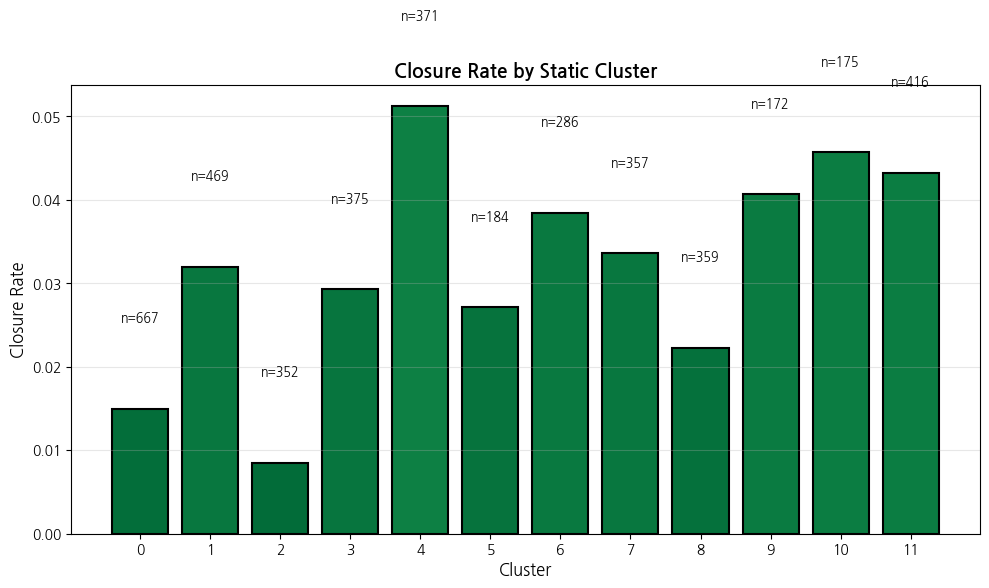


✅ Step 2 완료!
→ 'static_cluster' 컬럼이 store_features에 추가되었습니다.
→ 다음 단계: Step 3 - 클러스터별 위험신호 탐색


In [ ]:
# 클러스터별 폐업률 시각화
plt.figure(figsize=(10, 6))
cluster_closure = store_features.groupby('static_cluster')['is_closed'].agg(['mean', 'count'])
colors = plt.cm.RdYlGn_r(cluster_closure['mean'])

bars = plt.bar(cluster_closure.index, cluster_closure['mean'], color=colors, edgecolor='black', linewidth=1.5)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Closure Rate', fontsize=12)
plt.title('Closure Rate by Static Cluster', fontsize=14, fontweight='bold')
plt.xticks(cluster_closure.index)

# 막대 위에 가맹점 수 표시
for i, (idx, row) in enumerate(cluster_closure.iterrows()):
    plt.text(idx, row['mean'] + 0.01, f"n={int(row['count'])}",
             ha='center', va='bottom', fontsize=9)

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('cluster_closure_rates.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Step 2 완료!")
print(f"→ 'static_cluster' 컬럼이 store_features에 추가되었습니다.")
print(f"→ 다음 단계: Step 3 - 클러스터별 위험신호 탐색")

In [ ]:
# 각 클러스터의 특징 보기
store_features.groupby('static_cluster').agg({
    'industry': lambda x: x.value_counts().head(3).to_dict(),
    # 'region_3depth_name': lambda x: x.value_counts().head(3).to_dict(),
    'sales_amount_range_mean': 'mean',
    'nearest_subway_dist_km_mean': 'mean'
})

,industry,sales_amount_range_mean,nearest_subway_dist_km_mean
static_cluster,,,
0,"{'한식-육류/고기': 361, '한식-해물/생선': 107, '한식-국밥/설렁탕'...",2.850760,0.402316
1,"{'요리주점': 68, '한식-육류/고기': 48, '베이커리': 42}",3.036001,0.329949
2,"{'백반/가정식': 346, '반찬': 4, '도시락': 2}",3.658730,0.437784
3,"{'분식': 124, '베이커리': 84, '아이스크림/빙수': 48}",3.110546,0.386432
4,"{'한식-단품요리일반': 304, '일반 유흥주점': 45, '룸살롱/단란주점': 22}",3.743683,0.406595
5,"{'커피전문점': 182, '테이크아웃커피': 2}",3.315884,0.410023
6,"{'일식당': 131, '중식당': 97, '일식-덮밥/돈가스': 30}",2.687143,0.395015
7,"{'카페': 355, '테마카페': 2}",3.921280,0.418861
8,"{'축산물': 284, '농산물': 53, '인삼제품': 12}",4.303880,0.435129


In [ ]:
# 각 클러스터의 "성격" 파악
for cluster_id in range(12):
    print(f"\n=== Cluster {cluster_id} ===")
    cluster_data = store_features[store_features['static_cluster'] == cluster_id]

    print(f"가맹점 수: {len(cluster_data)}")
    print(f"폐업 수: {cluster_data['is_closed'].sum()}")
    print(f"\n주요 업종:")
    print(cluster_data['industry'].value_counts().head(5))
    # print(f"\n주요 지역:")
    print(cluster_data['region_3depth_name'].value_counts().head(3))
    print(f"\n평균 매출: {cluster_data['sales_amount_range_mean'].mean():.0f}")
    print(f"평균 고객수: {cluster_data['unique_customers_range_mean'].mean():.0f}")


=== Cluster 0 ===
가맹점 수: 667
폐업 수: 10

주요 업종:
industry
한식-육류/고기     361
한식-해물/생선     107
한식-국밥/설렁탕     55
한식-국수/만두      41
한식-찌개/전골      31
Name: count, dtype: int64
region_3depth_name
성수동2가    138
성수동1가     84
행당동       81
Name: count, dtype: int64

평균 매출: 3
평균 고객수: 3

=== Cluster 1 ===
가맹점 수: 469
폐업 수: 15

주요 업종:
industry
요리주점        68
한식-육류/고기    48
베이커리        42
호프/맥주       35
이자카야        34
Name: count, dtype: int64
region_3depth_name
성수동2가    139
행당동      126
성수동1가    110
Name: count, dtype: int64

평균 매출: 3
평균 고객수: 3

=== Cluster 2 ===
가맹점 수: 352
폐업 수: 3

주요 업종:
industry
백반/가정식    346
반찬          4
도시락         2
Name: count, dtype: int64
region_3depth_name
성수동2가    91
성수동1가    54
행당동      42
Name: count, dtype: int64

평균 매출: 4
평균 고객수: 4

=== Cluster 3 ===
가맹점 수: 375
폐업 수: 11

주요 업종:
industry
분식          124
베이커리         84
아이스크림/빙수     48
식료품          33
떡/한과 제조      15
Name: count, dtype: int64
region_3depth_name
행당동      93
성수동1가    41
하왕십리동    37
Name: count, dtype: int64



In [ ]:
from scipy import stats

# 26개 변화 지표 목록
change_indicators = [
    'sales_amount_range_diff', 'sales_amount_range_start_end_diff', 'sales_amount_range_deterioration_count',
    'sales_amount_range_consecutive_deterioration', 'sales_amount_range_worst_zone_ratio', 'sales_deterioration_acceleration',
    'sales_count_range_diff', 'sales_count_range_start_end_diff', 'sales_count_range_deterioration_count',
    'sales_count_range_consecutive_deterioration', 'sales_count_range_worst_zone_ratio',
    'unique_customers_range_diff', 'unique_customers_range_start_end_diff',
    'unique_customers_range_deterioration_count', 'unique_customers_range_worst_zone_ratio',
    'avg_spending_range_diff', 'delivery_sales_ratio_diff', 'cancel_rate_range_diff',
    'returning_customer_change', 'returning_customer_ratio_diff', 'elderly_ratio_change',
    'male_20_under_ratio_diff', 'female_30_ratio_diff',
    'floating_customer_ratio_diff', 'worker_customer_ratio_diff',
    'district_sales_rank_ratio_diff'
]

# Cohen's d 계산 함수 정의 (풀링된 표준편차 사용)
def calculate_cohen_d(x, y):
    # x: 폐업점 데이터, y: 생존점 데이터
    nx = len(x)
    ny = len(y)
    s_pooled = np.sqrt(
        ((nx - 1) * np.std(x, ddof=1)**2 + (ny - 1) * np.std(y, ddof=1)**2) / (nx + ny - 2)
    )
    if s_pooled == 0:
        return 0  # 분모가 0인 경우 (데이터가 동일할 때)
    return (np.mean(x) - np.mean(y)) / s_pooled

# 클러스터별 분석 실행
analysis_results = []

for cluster_id in range(12): # K=12 클러스터 모두 분석
    cluster_data = store_features[store_features['static_cluster'] == cluster_id]

    # 폐업점 수가 5개 미만인 클러스터는 분석 신뢰도가 낮으므로 경고
    n_closed = cluster_data['is_closed'].sum()
    if n_closed < 5:
        print(f"⚠️ Cluster {cluster_id}: 폐업점 수({n_closed}개)가 매우 적습니다. 결과 해석에 주의하세요.")

    # 폐업점과 생존점 그룹 분리
    closed_data = cluster_data[cluster_data['is_closed'] == True]
    survived_data = cluster_data[cluster_data['is_closed'] == False]

    for indicator in change_indicators:
        closed_values = closed_data[indicator].dropna()
        survived_values = survived_data[indicator].dropna()

        # 유효 데이터가 충분치 않으면 건너뛰기
        if len(closed_values) < 2 or len(survived_values) < 5:
            continue

        # 1. Cohen's d 계산
        d = calculate_cohen_d(closed_values, survived_values)

        # 2. Welch's T-test (equal_var=False) 실행 (폐업점 수가 적어 등분산 가정 회피)
        t_stat, p_value = stats.ttest_ind(closed_values, survived_values, equal_var=False)

        # 3. 결과 저장
        results = {
            'cluster_id': cluster_id,
            'indicator': indicator,
            '폐업점_mean': closed_values.mean(),
            '생존점_mean': survived_values.mean(),
            'Cohen_d': d,
            'P_Value': p_value
        }
        analysis_results.append(results)

# 결과를 DataFrame으로 변환 및 정렬
df_results = pd.DataFrame(analysis_results)
df_results['Abs_Cohen_d'] = df_results['Cohen_d'].abs()
df_results = df_results.sort_values(by=['cluster_id', 'Abs_Cohen_d'], ascending=[True, False])

# CSV로 저장하여 상세 분석 준비
df_results.to_csv('cluster_risk_signal_analysis.csv', index=False, encoding='utf-8-sig')

print("\n✅ Step 3 분석 완료: 'cluster_risk_signal_analysis.csv' 파일이 생성되었습니다.")

⚠️ Cluster 2: 폐업점 수(3개)가 매우 적습니다. 결과 해석에 주의하세요.

✅ Step 3 분석 완료: 'cluster_risk_signal_analysis.csv' 파일이 생성되었습니다.


In [ ]:
df_results

,cluster_id,indicator,폐업점_N,생존점_N,Cohen_d,P_Value,Abs_Cohen_d
5,0,sales_deterioration_acceleration,10,657,0.716738,0.013481,0.716738
16,0,delivery_sales_ratio_diff,4,214,-0.357173,0.000543,0.357173
8,0,sales_count_range_deterioration_count,10,657,-0.338641,0.146568,0.338641
18,0,returning_customer_change,10,648,-0.337175,0.088224,0.337175
19,0,returning_customer_ratio_diff,10,648,0.337175,0.088224,0.337175
...,...,...,...,...,...,...,...
282,11,floating_customer_ratio_diff,15,353,-0.016914,0.924036,0.016914
277,11,returning_customer_change,15,381,0.016640,0.912205,0.016640
278,11,returning_customer_ratio_diff,15,381,-0.016640,0.912205,0.016640
274,11,avg_spending_range_diff,17,396,0.011587,0.963759,0.011587


In [ ]:
import pandas as pd

# ⚠️ 주의: 이 코드는 'df_results' DataFrame이 이미 생성되어 있고
# 'Cohen_d', 'P_Value', 'Abs_Cohen_d' 컬럼을 포함하고 있다고 가정합니다.
# (이전 답변의 Step 3 실행 코드를 통해 생성되었어야 합니다.)
# df_results = pd.read_csv('cluster_risk_signal_analysis.csv') # 저장했다면 로드

# 1. 필터링 조건 정의
# Cohen's d의 절대값이 0.8 이상이면서 P-Value가 0.05 미만인 경우
STRONG_EFFECT_SIZE = 0.8
SIGNIFICANCE_LEVEL = 0.05

# 2. 강력한 위험 신호 필터링
strong_risk_signals = df_results[
    (df_results['Abs_Cohen_d'] >= STRONG_EFFECT_SIZE) &
    (df_results['P_Value'] < SIGNIFICANCE_LEVEL)
].copy()

# 3. 결과 정리 및 출력
# cluster_id 별로 정렬하고, Cohen's d의 절대값이 큰 순서로 재정렬
strong_risk_signals_sorted = strong_risk_signals.sort_values(
    by=['cluster_id', 'Abs_Cohen_d'],
    ascending=[True, False]
)

# 해석에 필요한 주요 컬럼만 선택
final_signals = strong_risk_signals_sorted[[
    'cluster_id', 'indicator', 'Cohen_d', 'P_Value',
    '폐업점_mean', '생존점_mean'
]]

print("✅ 강력한 위험 신호 (Cluster별 $|\mathbf{d}| \ge 0.8 \text{ AND } \mathbf{P} < 0.05$)")
print(final_signals)

# CSV로 저장하여 최종 인사이트 도출에 활용
final_signals.to_csv('final_strong_risk_signals.csv', index=False, encoding='utf-8-sig')
print("\n파일 저장 완료: 'final_strong_risk_signals.csv'")


✅ 강력한 위험 신호 (Cluster별 $|\mathbf{d}| \ge 0.8 	ext{ AND } \mathbf{P} < 0.05$)
     cluster_id                              indicator   Cohen_d   P_Value  \
136           5       sales_count_range_start_end_diff  0.925394  0.042702   
244           9  unique_customers_range_start_end_diff  1.166947  0.014997   
233           9      sales_amount_range_start_end_diff  1.058689  0.011080   
239           9       sales_count_range_start_end_diff  1.034264  0.041508   

     폐업점_mean  생존점_mean  
136  0.466667 -0.186220  
244  0.714286 -0.240404  
233  0.761905 -0.329293  
239  0.523810 -0.270707  

파일 저장 완료: 'final_strong_risk_signals.csv'


시각화 완료: 'strong_risk_signals_comparison.png' 파일을 확인하세요.


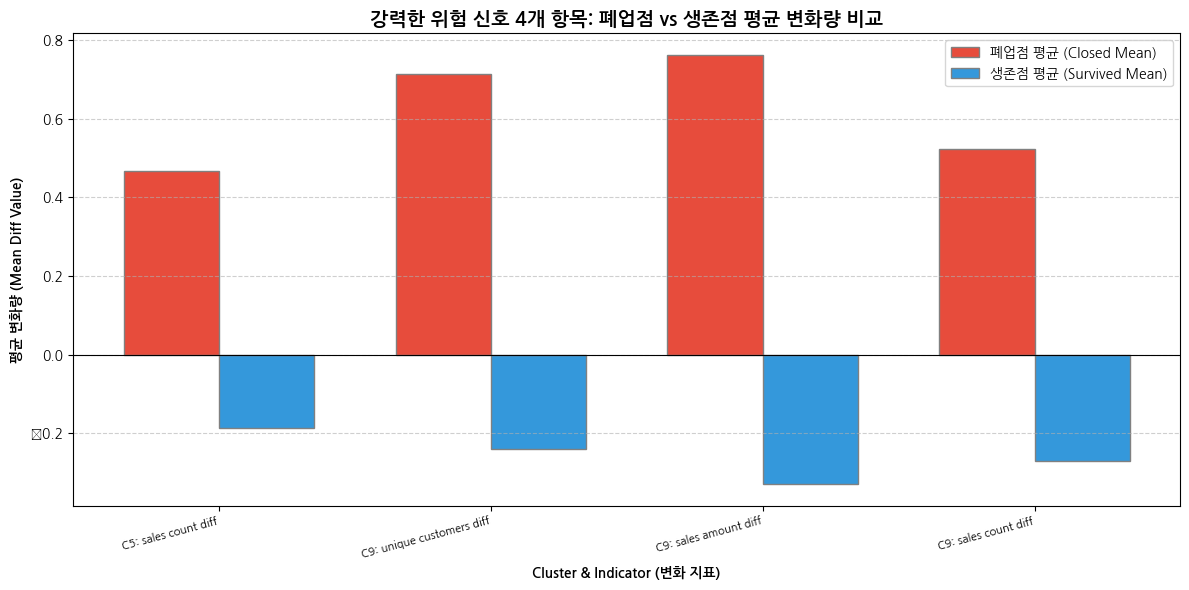

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 시각화할 데이터 재구성 (이전 분석 결과에서 추출)
# 주의: 이 값들은 원본 데이터가 아닌, 분석된 변화량(diff)의 평균입니다.
data = {
    'cluster_id': [5, 9, 9, 9],
    'indicator': [
        'sales_count_range_start_end_diff',
        'unique_customers_range_start_end_diff',
        'sales_amount_range_start_end_diff',
        'sales_count_range_start_end_diff'
    ],
    '폐업점_mean': [0.466667, 0.714286, 0.761905, 0.523810],
    '생존점_mean': [-0.186220, -0.240404, -0.329293, -0.270707]
}
df_plot = pd.DataFrame(data)

# 2. Plotting을 위한 Long Format으로 변환
df_plot['Signal_Label'] = df_plot['cluster_id'].astype(str).apply(lambda x: f"C{x}: ") + \
                          df_plot['indicator'].str.replace('_range_start_end_diff', '_diff').str.replace('_', ' ')

df_melt = df_plot.melt(
    id_vars=['Signal_Label'],
    value_vars=['폐업점_mean', '생존점_mean'],
    var_name='Group',
    value_name='Mean_Value'
)

# 3. Bar Plot 시각화
plt.figure(figsize=(12, 6))

# 군집 막대 그래프 생성
bar_width = 0.35
r1 = np.arange(len(df_plot))
r2 = [x + bar_width for x in r1]

plt.bar(r1, df_plot['폐업점_mean'], color='#E74C3C', width=bar_width, edgecolor='grey', label='폐업점 평균 (Closed Mean)')
plt.bar(r2, df_plot['생존점_mean'], color='#3498DB', width=bar_width, edgecolor='grey', label='생존점 평균 (Survived Mean)')

# 4. 축 레이블 및 제목 설정
plt.xlabel('Cluster & Indicator (변화 지표)', fontweight='bold', fontsize=10)
plt.ylabel('평균 변화량 (Mean Diff Value)', fontweight='bold', fontsize=10)
plt.xticks([r + bar_width/2 for r in r1], df_plot['Signal_Label'], rotation=15, ha='right', fontsize=8)
plt.title('강력한 위험 신호 4개 항목: 폐업점 vs 생존점 평균 변화량 비교', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# y=0 선 추가
plt.axhline(0, color='black', linewidth=0.8)

plt.tight_layout()
plt.savefig('strong_risk_signals_comparison.png')

print("시각화 완료: 'strong_risk_signals_comparison.png' 파일을 확인하세요.")

시각화 완료: 'strong_risk_signals_distribution.png' 파일을 확인하세요. (Seaborn 필요)


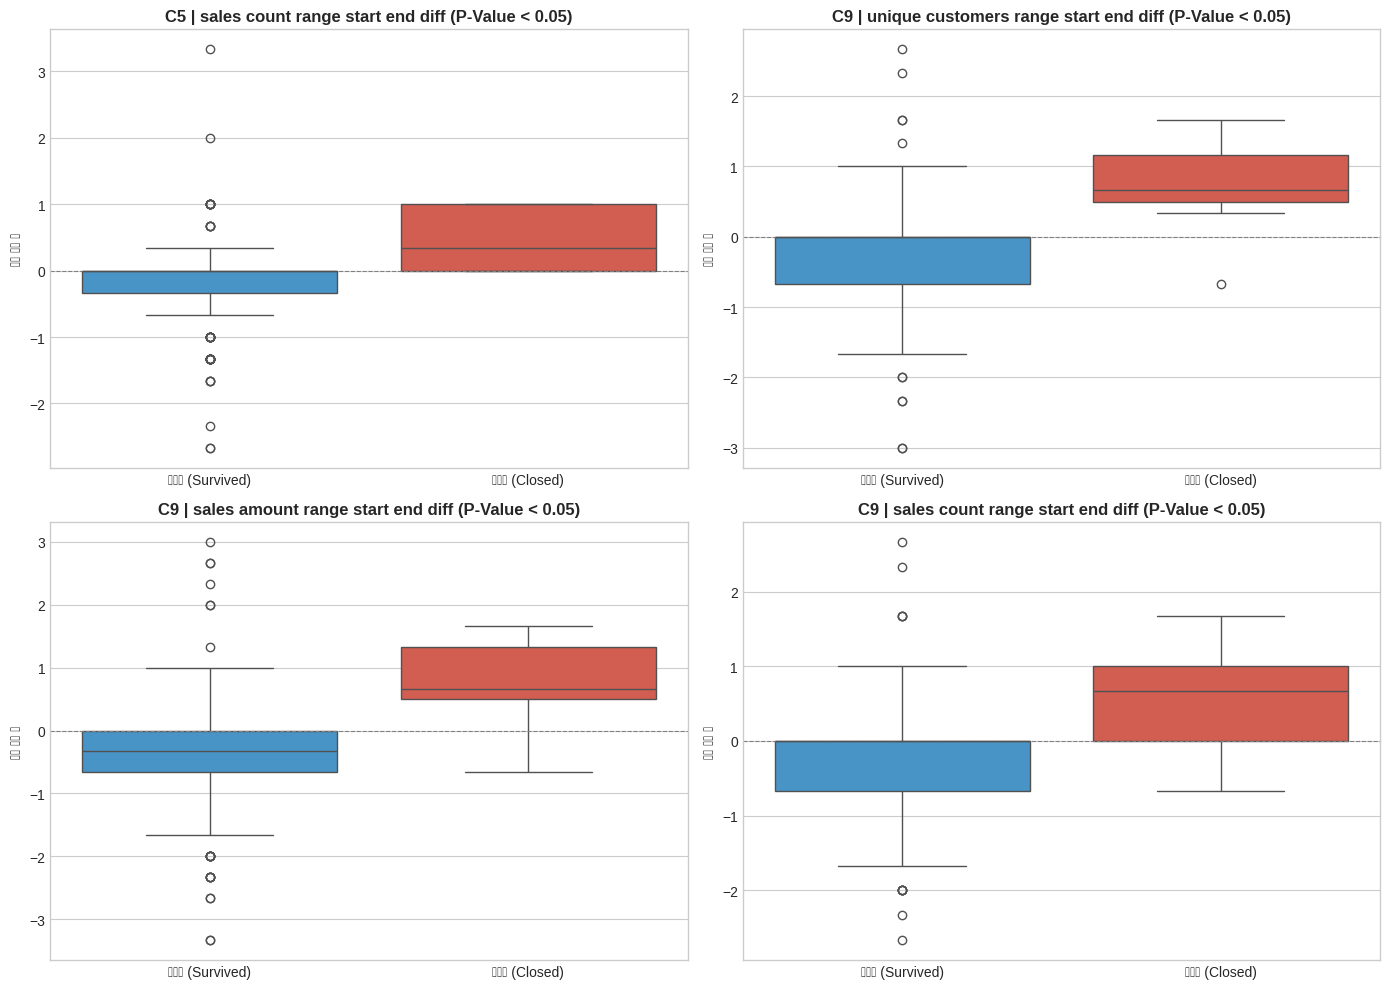

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# ⚠️ 'store_features' DataFrame과 'static_cluster' 컬럼이 존재한다고 가정합니다.

# 1. 시각화 대상 4개 지표 정의 (클러스터 ID, 지표명)
signals_to_plot = [
    (5, 'sales_count_range_start_end_diff'),
    (9, 'unique_customers_range_start_end_diff'),
    (9, 'sales_amount_range_start_end_diff'),
    (9, 'sales_count_range_start_end_diff'),
]

plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# 2. 4개 지표 반복 시각화
for i, (c_id, indicator) in enumerate(signals_to_plot):
    ax = axes[i]

    # 해당 클러스터 데이터 필터링
    cluster_data = store_features[store_features['static_cluster'] == c_id].copy()

    # 그룹 레이블 설정
    cluster_data['Group'] = cluster_data['is_closed'].apply(
        lambda x: '폐업점 (Closed)' if x else '생존점 (Survived)'
    )

    # Box Plot 생성
    sns.boxplot(
        x='Group',
        y=indicator,
        data=cluster_data,
        palette={'폐업점 (Closed)': '#E74C3C', '생존점 (Survived)': '#3498DB'},
        ax=ax
    )

    # 제목 설정
    title = f"C{c_id} | {indicator.replace('_', ' ')} (P-Value < 0.05)"
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('변화 지표 값', fontsize=10)

    # y=0 라인 추가 (변화 기준점)
    ax.axhline(0, color='grey', linestyle='--', linewidth=0.8)

plt.tight_layout()
plt.savefig('strong_risk_signals_distribution.png')
print("시각화 완료: 'strong_risk_signals_distribution.png' 파일을 확인하세요. (Seaborn 필요)")

In [ ]:
# df_results DataFrame이 존재한다고 가정합니다.
STRONG_EFFECT_SIZE_FOR_INSIGHT = 0.5  # 기준을 0.5로 완화하여 인사이트 발굴

# 1. Cohen's d가 0.5 이상인 모든 지표 선별
insight_signals = df_results[
    df_results['Abs_Cohen_d'] >= STRONG_EFFECT_SIZE_FOR_INSIGHT
].copy()

# 2. 결과 정리 (시각화를 위해 클러스터/지표 목록만 준비)
visualization_list = insight_signals[['cluster_id', 'indicator']].values.tolist()

print(f"✅ 시각화 대상 지표 총 {len(visualization_list)}개 선별 완료.")

✅ 시각화 대상 지표 총 64개 선별 완료.



✅ Box Plot 시각화 완료: 'all_cluster_key_signals_distribution.png' 파일을 확인하세요.


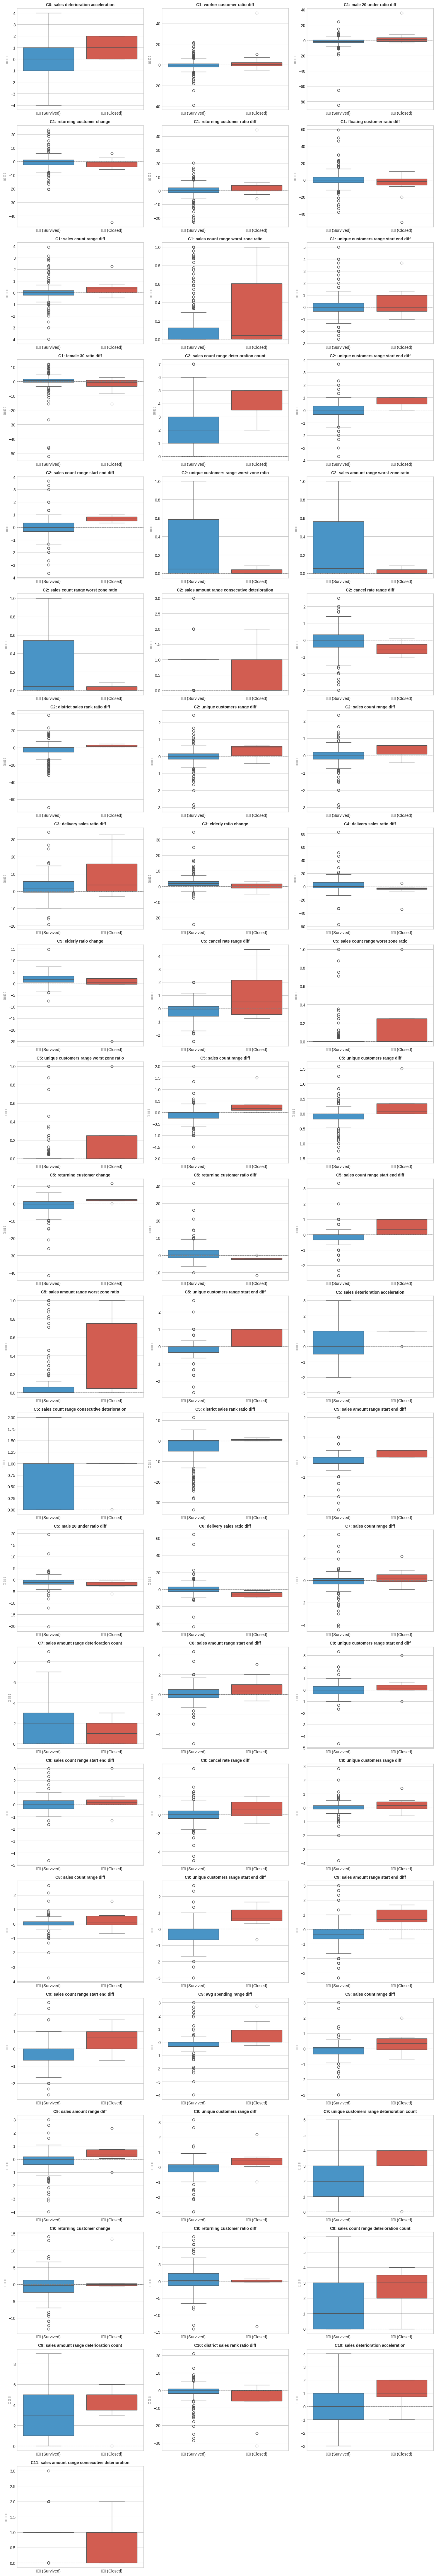

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ⚠️ 'visualization_list' (위 필터링 결과)와 'store_features' DataFrame이 필요합니다.

# 서브플롯 크기 자동 계산 (한 줄에 최대 3개)
num_plots = len(visualization_list)
if num_plots == 0:
    print("시각화할 유의미한 지표가 없습니다 (d >= 0.5).")
else:
    cols = 3
    rows = int(np.ceil(num_plots / cols))

    # 3. Box Plot 시각화 실행
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
    axes = axes.flatten()

    for i, (c_id, indicator) in enumerate(visualization_list):
        ax = axes[i]

        # 해당 클러스터 데이터 필터링
        cluster_data = store_features[store_features['static_cluster'] == c_id].copy()

        # 그룹 레이블 설정
        cluster_data['Group'] = cluster_data['is_closed'].apply(
            lambda x: '폐업점 (Closed)' if x else '생존점 (Survived)'
        )

        # Box Plot 생성
        sns.boxplot(
            x='Group',
            y=indicator,
            data=cluster_data,
            palette={'폐업점 (Closed)': '#E74C3C', '생존점 (Survived)': '#3498DB'},
            ax=ax
        )

        # 제목 설정: 클러스터 ID와 d 값 포함 (d 값은 df_results에서 찾아와야 정확하나, 여기서는 편의상 지표명만 표시)
        title = f"C{c_id}: {indicator.replace('_', ' ')}"
        ax.set_title(title, fontsize=10, fontweight='bold')
        ax.set_xlabel('')
        ax.set_ylabel('변화 지표 값', fontsize=8)
        ax.axhline(0, color='grey', linestyle='--', linewidth=0.8) # y=0 선

    # 사용하지 않는 서브플롯 숨기기
    for j in range(num_plots, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.savefig('all_cluster_key_signals_distribution.png', dpi=300)
    print(f"\n✅ Box Plot 시각화 완료: 'all_cluster_key_signals_distribution.png' 파일을 확인하세요.")

In [ ]:
store_features.to_csv('1002_store_features.csv',index=False)